1. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
#import data frame
df = pd.read_csv(r'/Users/samuelcallender/Documents/World University Rankings/02 Data/Prepared Data/cwurData_checked.csv')

In [4]:
df.head(10)

,World Rank,Institution,Country,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Publications,Influence,Citations,Broad Impact,Patents,Score,Year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [5]:
df.shape

(2200, 14)

In [6]:
df.isnull().sum()

World Rank                0
Institution               0
Country                   0
National Rank             0
Quality of Education      0
Alumni Employment         0
Quality of Faculty        0
Publications              0
Influence                 0
Citations                 0
Broad Impact            200
Patents                   0
Score                     0
Year                      0
dtype: int64

2. Remove categorical columns to prepare for kmeans algorithm

In [7]:
df.columns

Index(['World Rank', 'Institution', 'Country', 'National Rank',
       'Quality of Education', 'Alumni Employment', 'Quality of Faculty',
       'Publications', 'Influence', 'Citations', 'Broad Impact', 'Patents',
       'Score', 'Year'],
      dtype='object')

In [8]:
#select numerical variables for analysis
analysis = df[['World Rank', 'National Rank', 'Quality of Education','Quality of Faculty',
    'Patents', 'Score', 'Alumni Employment']]

In [10]:
analysis.columns

Index(['World Rank', 'National Rank', 'Quality of Education',
       'Quality of Faculty', 'Patents', 'Score', 'Alumni Employment'],
      dtype='object')

In [11]:
analysis.head(10)

,World Rank,National Rank,Quality of Education,Quality of Faculty,Patents,Score,Alumni Employment
0,1,1,7,1,5,100.00,9
1,2,2,9,3,1,91.67,17
2,3,3,17,5,15,89.50,11
3,4,1,10,4,50,86.17,24
4,5,4,2,7,18,85.21,29
5,6,5,8,2,101,82.50,14
6,7,2,13,9,26,82.34,28
7,8,6,14,12,66,79.14,31
8,9,7,23,10,5,78.86,21
9,10,8,16,6,16,78.55,52


3. Applying the Elbow Technique

In [12]:
#decide on the number of clusters
num_cl = range(1,5)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [13]:
score = [kmeans[i].fit(analysis).score(analysis) for i in range(len(kmeans))]
score

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[-493190619.93785405,
 -214602289.51086563,
 -155316402.03760415,
 -125520441.46684374]

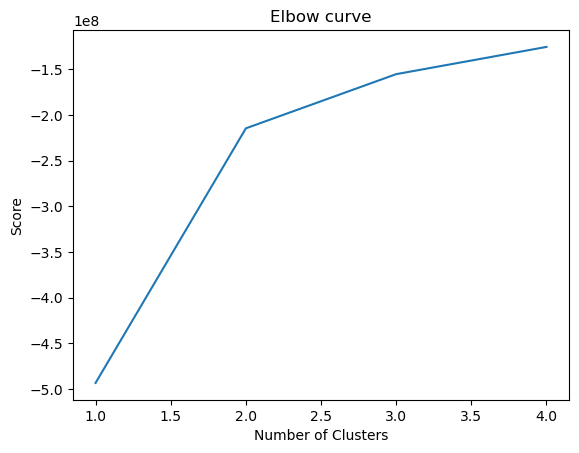

In [14]:
#plotting the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow curve')
pl.show()

From the visual above, we can see there is a sharp curve around 2.0. The next curve we see happens around 3.0, where the line begins to flatten out. Because the curve starts to flatten out at 3.0, we will use 3 clusters.

4. Running the k-means algorithm

In [15]:
#create k-means object
kmeans = KMeans(n_clusters =3)

In [16]:
#fitting the k-means object to the data
kmeans.fit(analysis)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
#add a new column for number of Clusters
analysis['Clusters'] = kmeans.fit_predict(analysis)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/82/hwgv6lvn7x18xkthsy6ltc5c0000gn/T/ipykernel_8162/545868256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis['Clusters'] = kmeans.fit_predict(analysis)


In [19]:
analysis.head(10)

,World Rank,National Rank,Quality of Education,Quality of Faculty,Patents,Score,Alumni Employment,Clusters
0,1,1,7,1,5,100.00,9,1
1,2,2,9,3,1,91.67,17,1
2,3,3,17,5,15,89.50,11,1
3,4,1,10,4,50,86.17,24,1
4,5,4,2,7,18,85.21,29,1
5,6,5,8,2,101,82.50,14,1
6,7,2,13,9,26,82.34,28,1
7,8,6,14,12,66,79.14,31,1
8,9,7,23,10,5,78.86,21,1
9,10,8,16,6,16,78.55,52,1


In [20]:
analysis.head(20)

,World Rank,National Rank,Quality of Education,Quality of Faculty,Patents,Score,Alumni Employment,Clusters
0,1,1,7,1,5,100.00,9,1
1,2,2,9,3,1,91.67,17,1
2,3,3,17,5,15,89.50,11,1
3,4,1,10,4,50,86.17,24,1
4,5,4,2,7,18,85.21,29,1
5,6,5,8,2,101,82.50,14,1
6,7,2,13,9,26,82.34,28,1
7,8,6,14,12,66,79.14,31,1
8,9,7,23,10,5,78.86,21,1
9,10,8,16,6,16,78.55,52,1


In [21]:
analysis['Clusters'].value_counts()

2    912
0    748
1    540
Name: Clusters, dtype: int64

5. Create Scatterplots using Clustered Data

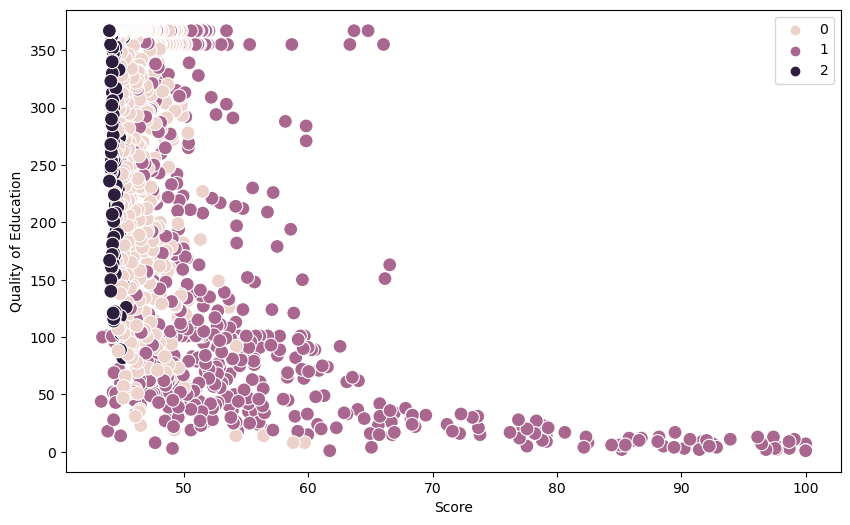

In [22]:
#scatterplot for Score and Quality of Education
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=analysis['Score'], y= analysis['Quality of Education'], hue = kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Score')
plt.ylabel('Quality of Education')
plt.show()

In [23]:
analysis.loc[analysis['Clusters'] == 2, 'Cluster'] = 'dark purple'
analysis.loc[analysis['Clusters'] == 1, 'Cluster'] = 'purple'
analysis.loc[analysis['Clusters'] == 0, 'Cluster'] = 'pink'

/var/folders/82/hwgv6lvn7x18xkthsy6ltc5c0000gn/T/ipykernel_8162/3981606639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis.loc[analysis['Clusters'] == 2, 'Cluster'] = 'dark purple'


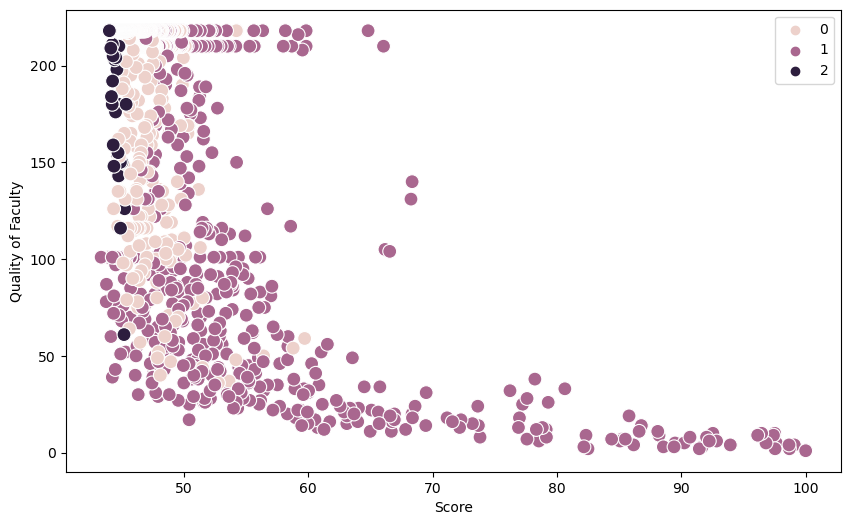

In [24]:
#scatterplot for Score and Quality of Faculty
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=analysis['Score'], y= analysis['Quality of Faculty'], hue = kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Score')
plt.ylabel('Quality of Faculty')
plt.show()

Initial Observation: While it is helpful to have the above plot broken into colors, there really isn't a clear grouping between the three cluster. They are all mixed in for the most part. 

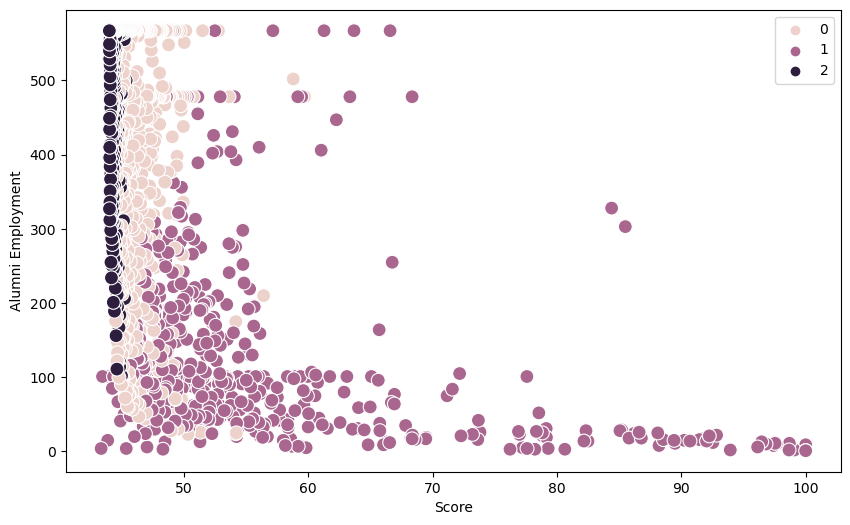

In [25]:
#scatterplot for Alumni Employment
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=analysis['Score'], y= analysis['Alumni Employment'], hue = kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Score')
plt.ylabel('Alumni Employment')
plt.show()

In [26]:
analysis.loc[analysis['Clusters'] == 2, 'Cluster'] = 'dark purple'
analysis.loc[analysis['Clusters'] == 1, 'Cluster'] = 'purple'
analysis.loc[analysis['Clusters'] == 0, 'Cluster'] = 'pink'

6. Calculate descriptive Statistics using groupby() function

In [27]:
analysis.groupby('Cluster').agg({'Quality of Education':['mean', 'median'], 
                         'Score':['mean', 'median'], 
                         'Quality of Faculty':['mean', 'median']})

Quality of Education             Score        Quality of Faculty  \
                            mean median       mean median               mean   
Cluster                                                                        
dark purple           345.127193  355.0  44.456064  44.42         212.982456   
pink                  300.459893  355.0  46.155348  45.61         197.058824   
purple                121.705556   95.5  55.719148  51.25          96.137037   

                    
            median  
Cluster             
dark purple  218.0  
pink         210.0  
purple        82.0

7. Future steps for Analytics pipeline

Aftering creating scatterplots for the Quality of Education, Quality of Faculty, and Alumni Employment variables, we can visually see that there really are no clusters that can be defined to follow a particular pattern. 

In regards to next steps, I would recommend increasing the size of the data set, if at all possible. Then we can run this type of analysis again to see what results are produced. 